# CNJCx Week 5: Practical Python

Tyler Benster
(tbenst@stanford.edu)

## Outline
### Motivation and background
### Hands-on coding

### Motivation and background
- Goals
- Anti-goals
- Extra details
- Tidy Data
- Today's Python Packages

## Goals for today
- "Day in the life" of a Pythonista
- Whirlwhind tour of foudational packages for Data Scientists in Python
- Exposure to opinionated best-practices for formating data and code
- understand the "why" of each code block
- know which library to use for particular analyses

## Anti-goals for today
- comprehend the "how" of each line of code
- know which function to use for particular analyses
- understand the math behind shown analyses
- feeling that the class is going at a comfortable pace
- understand how this presentation was made in a Jupyter notebook with RISE/reveal.js

## Extra details for eager or advanced listeners
- <details>
    <summary><a><strong>IYI</strong></a>: If You're Interested; click me! (no seriously please do :)</summary>
    Optional contest will be prefaced by IYI. This is not essential for understanding the presentation, and if you are at all feeling lost or confused, now is a great time to ignore what I'm saying and ask questions in the chat. IYI is inspired by David Foster Wallace's Infinite Jest.
</details>
- Bonus: quick peak at modern deep learning in Pytorch

## Easy visualization with Tidy Data
![tidy data](https://r4ds.had.co.nz/images/tidy-1.png)

See Hadley Wickham's [publication](https://www.jstatsoft.org/article/view/v059i10) for more details and motivation.

### Hands-on coding
- Data visualization: how to make some basic plots (matplotlib, Altair)
- (5 minute break)
- Advanced data analysis: interrogate the data and visualize(scipy.stats, sklearn)
- how to read in common data formats (images, MAT v6/v7, HDF5, csv)
- data munging: what data structures and patterns to use for optimal efficiency (numpy, pytorch tensor, pandas, tidy data)

## First-up: matplotlib
matplotlib is the most popular plotting library in Python, and is a swiss army knife that can do virtually anything. It's also the most manual difficult to use.

Let's load some example data first

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# load data
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [2]:
for key, value in iris.items():
    if not key in ['data', 'target']:
        print(f"=========\n{key}: {value}")

target_names: ['setosa' 'versicolor' 'virginica']
DESCR: .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high

Let's create a basic scatter plot using the procedural (scripting) interface

Text(0, 0.5, 'petal length (cm)')

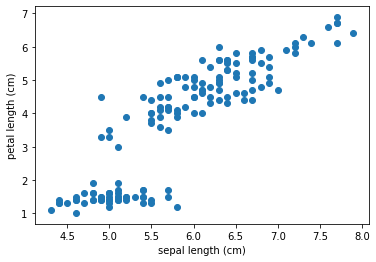

In [3]:
plt.scatter(iris.data[:,0], iris.data[:,2])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])

Now, we create subplots with coloring & legend using the alternate Object-oriented interface

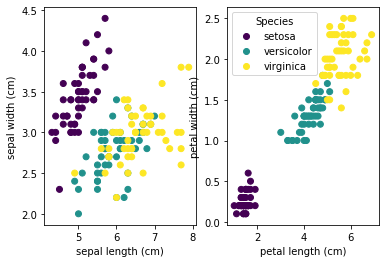

In [5]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(iris.data[:,0], iris.data[:,1], c=iris.target)
axes[0].set_xlabel(iris.feature_names[0])
axes[0].set_ylabel(iris.feature_names[1])
scatter1 = axes[1].scatter(iris.data[:,2], iris.data[:,3], c=iris.target)
axes[1].set_xlabel(iris.feature_names[2])
axes[1].set_ylabel(iris.feature_names[3])
axes[1].legend(scatter1.legend_elements()[0],
               iris.target_names, title="Species")

Uh oh, that looks terrible. Here's a quick fix:

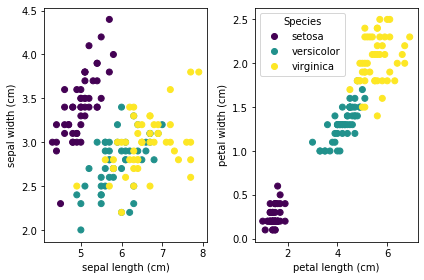

In [6]:
fig.tight_layout()
fig

Better, but legend location still problematic.

**IYI**: This can be fixed using low-level arguments like `bbox`, see [here](https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot)

## Surely there's a better way??
Introducing the "Grammar of Graphics"! Other python GoG packages include Seaborn and Holoviews. We use Altair, as it is implemented on the cross-language Vega-lite, so what you learn today can also be done in Julia or even used for interactive web-charts!

![grammar of graphics](https://miro.medium.com/max/2000/1*mcLnnVdHNg-ikDbHJfHDNA.png)

**IYI** conceptual guide [here](https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149)

## Introducing pandas: convient tables in python

First, let's install a python package with example datasets

In [ ]:
!pip install vega_datasets

Next we load an example DataFrame

In [7]:
from vega_datasets import data
import altair as alt, pandas as pd

cars_df = data.cars()
print(f"object type: {type(cars_df)}")

object type: <class 'pandas.core.frame.DataFrame'>


DataFrames have some convenient methods to help us inspect it

In [8]:
cars_df.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


In [9]:
cars_df.columns

Index(['Name', 'Miles_per_Gallon', 'Cylinders', 'Displacement', 'Horsepower',
       'Weight_in_lbs', 'Acceleration', 'Year', 'Origin'],
      dtype='object')

In [10]:
cars_df.tail()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA
405,chevy s-10,31.0,4,119.0,82.0,2720,19.4,1982-01-01,USA


Some of these methods can be chained:

In [11]:
cars_df.Name.tail()

401    ford mustang gl
402          vw pickup
403      dodge rampage
404        ford ranger
405         chevy s-10
Name: Name, dtype: object

Here we select a single value

In [12]:
cars_df["Name"][402]

'vw pickup'

Let's take a look at the type of each Series (column)

In [13]:
cars_df.dtypes

Name                        object
Miles_per_Gallon           float64
Cylinders                    int64
Displacement               float64
Horsepower                 float64
Weight_in_lbs                int64
Acceleration               float64
Year                datetime64[ns]
Origin                      object
dtype: object

Let's see the various Origins

In [14]:
cars_df.Origin.unique()

array(['USA', 'Europe', 'Japan'], dtype=object)

We can easily do `where` queries

In [15]:
cars_df[cars_df.Origin=='USA'].head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


Or chain multiple requirements

In [16]:
from datetime import datetime
idxs = np.all([cars_df.Origin=='USA',
              cars_df.Horsepower>200,
              cars_df.Year<=datetime(1972,1,1)],
             axis=0)
cars_df[idxs]

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,1970-01-01,USA
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,1970-01-01,USA
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,1970-01-01,USA
19,buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,1970-01-01,USA
31,ford f250,10.0,8,360.0,215.0,4615,14.0,1970-01-01,USA
33,dodge d200,11.0,8,318.0,210.0,4382,13.5,1970-01-01,USA
74,mercury marquis,11.0,8,429.0,208.0,4633,11.0,1972-01-01,USA


# Plotting Tidy Data with Altair
Since our data is Tidy, we can use the Grammar of Graphics to make plots!

In [17]:
line = alt.Chart(cars_df).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)'
)
# https://altair-viz.github.io/user_guide/generated/core/altair.ErrorBandDef.html#altair.ErrorBandDef
band = alt.Chart(cars_df).mark_errorband(extent='ci').encode(
    x='Year',
    y=alt.Y('Miles_per_Gallon', title='Miles/Gallon'),
)

band + line

alt.LayerChart(...)

The power of this approach becomes especially apparent with complex plots that would require a lot of work for each axis with matplotlib

In [18]:
line = alt.Chart(cars_df).mark_line().encode(
    x='Year',
    y=alt.Y('mean(Miles_per_Gallon)', title="average MPG"),
    color='Cylinders:O' # we specify that the data is Ordinal, meaning ordered
).properties(
    width=180,
    height=180
).facet(
    facet='Origin:N', # data is Nominal, meaning categorical
    columns=3
)
line

alt.FacetChart(...)

### Excercise 1: make a scatter plot of Horsepower vs Acceleration, colored by Origin
Instead of `mark_line`, use `mark_point`

In [19]:
# your code here...feel free to refer to cells above!


Let's quickly revist the Iris dataset and show off our new skills!

In [20]:
iris_df = data.iris()

alt.Chart(iris_df).mark_circle().encode(
    alt.X('sepalLength', scale=alt.Scale(zero=False)),
    alt.Y('sepalWidth', scale=alt.Scale(zero=False, padding=1)),
    color='species',
    size='petalWidth'
)

alt.Chart(...)

Finally, **IYI**, here's a more advanced figure: Violin plot using `transform_density`

In [21]:
violin = alt.Chart(cars_df).transform_density(
    'Miles_per_Gallon',
    as_=['Miles_per_Gallon', 'density'],
    extent=[5, 50],
    groupby=['Origin']
).mark_area(orient='horizontal').encode(
    y='Miles_per_Gallon:Q',
    color='Origin:N',
    x=alt.X(
        'density:Q',
        stack='center',
        impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True),
    ),
    column=alt.Column(
        'Origin:N',
        header=alt.Header(
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=0,
        ),
    )
).properties(
    width=100
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

In [22]:
violin

alt.Chart(...)

For more, checkout this example gallery of beautiful plots with shockingly few lines of code: https://altair-viz.github.io/gallery/index.html

## (5 minute break)

**IYI** A poem while we wait

In [ ]:
import this

# WIP below here

## Data munging

In [ ]:
## Retinal ganglion cells
rgcs_df = pd.read_csv("rgc_light_response.csv")

In [ ]:
rgcs_df.head()

In [ ]:
rgcs_tidy = pd.melt(rgcs_df, id_vars=['retina', 'id', 'ntrials'],
        var_name="time_bin",
        value_name="spike_count",
        value_vars=list(map(str, np.arange(35))))
# 100ms time bins
rgcs_tidy["time"] = (pd.to_numeric(rgcs_tidy.time_bin) + 1) / 10
rgcs_tidy["firing_rate"] = rgcs_tidy.spike_count / rgcs_tidy.ntrials * 10
rgcs_tidy.drop(columns=["spike_count", "ntrials", "time_bin"], inplace=True)
rgcs_tidy

In [ ]:
rgcs_tidy.dtypes

In [ ]:
alt.data_transformers.disable_max_rows()

In [ ]:
line = alt.Chart(rgcs_tidy).mark_line(
    stroke="black"
).encode(
    x="time:Q",
    y="mean(firing_rate)",
#     detail="firing_rate"
)

# 5% of cells so not too overwhelming
ids = rgcs_tidy.id.unique()[::20]
detail = alt.Chart(rgcs_tidy[rgcs_tidy.id.isin(ids)]).mark_line(
    opacity=0.1,
#     stroke='black'
).encode(
    x="time:Q",
    y="firing_rate",
    detail="id",
    color="id"
)

# band = alt.Chart(rgcs_tidy).mark_area(extent='stdev').encode(
#     x='time',
#     y='min(firing_rate)',
#     y2='max(firing_rate)'
# #     y=alt.Y('firing_rate', title='firing rate (Hz)'),
# )

darkness = pd.DataFrame({"start": [0.0,1.5], "end":[1.0, 3.5]})

# See Vega-lite docuentation on rect mark
# https://vega.github.io/vega/docs/marks/rect/
rect = alt.Chart(darkness).mark_rect(
    fillOpacity=0.1,
    fill='black'
).encode(
    x='start',
    x2='end',
)


line+rect
# (detail + rect + line)

First, we create a nSamples x nFeatures matrix

In [ ]:
rgcs_tidy.head()

In [ ]:
aggfunc = len

In [ ]:
rgcs_tidy.pivot_table(index='id', columns='time', values='firing_rate', aggfunc = len)

In [ ]:
data = np.array(rgcs_df.iloc[:,6:])
data.shape

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold.t_sne import TSNE

In [ ]:
pca = PCA(n_components=2)
projected_data = pca.fit_transform(data)

In [ ]:
projected_data.shape

In [ ]:
plt.scatter(projected_data[:,0], projected_data[:,1])

In [ ]:
tsne = TSNE(n_components=2)
# This is slow, so we only fit on every 10th cell for demonstration purposes
tsne_data = tsne.fit_transform(data[::10])

In [ ]:
from sklearn.cluster import OPTICS
optics = OPTICS(xi=0.05,min_samples=25)
optics.fit(projected_data)

plt.hist(optics.labels_, bins=np.arange(optics.labels_.max()+1))
plt.title("Count by cluster label")
print(f"fraction unclustered: {sum(optics.labels_==-1)/len(data):.3f}")

In [ ]:
from matplotlib import cm

In [ ]:
num_clusters = optics.labels_.max()+1 # 0-index
unit_interval_class = optics.labels_ / num_clusters

In [ ]:
colors = [cm.tab20(f) if f>=0 else cm.colors.to_rgba("gray")
          for f in unit_interval_class[::10]]
plt.scatter(tsne_data[:,0], tsne_data[:,1],
            color=colors)

In [ ]:
rgcs_df

In [ ]:
pd.melt?

In [ ]:
rgcs_with_cluster = rgcs_df.copy()
rgcs_with_cluster["cluster"] = optics.labels_
# filter to include only clustered cells
rgcs_with_cluster = rgcs_with_cluster[rgcs_with_cluster.cluster!=-1]
tidy_data = pd.melt(rgcs_with_cluster, id_vars=['retina', 'id', 'ntrials', "cluster"],
        var_name="time_bin",
        value_name="spike_count",
        value_vars=list(map(str, np.arange(35))))
# 100ms time bins
tidy_data["time"] = pd.to_numeric(tidy_data.time_bin) / 10
tidy_data["firing_rate"] = tidy_data.spike_count / tidy_data.ntrials * 10
tidy_data.drop(columns=["spike_count", "ntrials", "time_bin"], inplace=True)
tidy_data

In [ ]:
## Altair

In [ ]:
alt.Chart(tidy_data).mark_line().encode(
    x = "time",
    y = "mean(firing_rate)"
)

In [ ]:
# from hd
from hdbscan import HDBSCAN

In [ ]:
pip install vega_datasets

In [ ]:
import hdbscan

In [ ]:
hdbscan
optics.labels_.max()

In [ ]:
## archive

In [ ]:
cols = "retina,id,i,j,unit_num,ntrials,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34".split(",")

In [ ]:
csv = pd.read_csv("/home/tyler/Dropbox/Science/manuscripts/2019_acuity_paper/acuity_paper/code/integrity_units_100ms.csv",
                 index_col=False,
                 names=cols)[1:]

In [ ]:
csv = csv[np.logical_not(csv.retina.str.contains("BENAQ"))]

In [ ]:
csv

In [ ]:
csv.to_csv("rgc_light_response.csv", index=False)

## Solutions

In [ ]:
cars_df

In [ ]:
line = alt.Chart(cars_df).mark_point().encode(
    x=alt.X('Horsepower', bin=True),
    y=alt.Y('Acceleration', bin=True),
    size="count()"
    
)
line